# Basic Model Pipeline

## Imports

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

from data_cleaner import DataCleaner
from predictor import Predictor
from utils import visualize_all

import warnings
warnings.filterwarnings('ignore')

## Load and clean data

In [30]:
features_to_drop = [
    'Detail',
    'Detail on NON UIP',
    'Pathology Pattern Binary',
    'Pathology pattern',
    'Extras AP',
    'Treatment',
    'Extra',
    'Transplantation date',
    'Date of death',
    'Cause of death',
    'Identified Infection',
    'Pathology pattern UIP, probable or CHP',
    'Severity of telomere shortening - Transform 4',
    'FVC (L) 1 year after diagnosis', 
    'FVC (%) 1 year after diagnosis',
    'DLCO (%) 1 year after diagnosis', 
    'RadioWorsening2y',
]   

selected_features = [
       # 'Pedigree', 
       'Sex', 
       'FamilialvsSporadic',
       'Age at diagnosis', 
       'Comorbidities',
       'Radiological Pattern', 
       'Diagnosis after Biopsy',
       'Multidsciplinary committee', 
       'Pirfenidone', 
       'Nintedanib',
       'Antifibrotic Drug', 
       'Prednisone', 
       'Mycophenolate',
       'Extrapulmonary affectation',
       'Associated lung cancer', 
       'Other cancer', 
       'Type of neoplasia',
       'Blood count abnormality at diagnosis', 
       'Anemia', 
       'Thrombocytopenia',
       'Thrombocytosis', 
       'Lymphocytosis', 
       'Lymphopenia', 
       'Neutrophilia',
       'Neutropenia', 
       'Leukocytosis', 
       'Leukopenia',
       'LDH', 
       'ALT',
       'AST', 
       'ALP', 
       'GGT', 
       'Transaminitis', 
       'Cholestasis',
       'Liver disease', 
       #'FVC (L) at diagnosis',
       'FVC (%) at diagnosis', 
       'DLCO (%) at diagnosis',
       'Necessity of transplantation', 
       'Death', 
       # 'Type of family history',
       '1st degree relative', 
       '2nd degree relative', 
       'More than 1 relative',
       'Genetic mutation studied in patient', 
       'Mutation Type',
       'Severity of telomere shortening',
       'Progressive disease',
    #    'ProgressiveDisease', 
       'telomeric affectation', 
       'Hematologic Abnormalities', 
       'Liver Problem',
       'TERT',
       #'COD NUMBER',
       #'Final diagnosis',
       'Event'
       ]

In [31]:
data_path = 'data/FibroPredCODIFICADA.xlsx'  # Replace with your actual file path
df = pd.read_excel(data_path, skiprows=1)

cleaner = DataCleaner(df)
df_clean = cleaner.clean(selected_features=selected_features, features_to_drop=features_to_drop)

df_train, df_test = train_test_split(
    df_clean, 
    test_size=0.2, 
    shuffle=True, 
    # random_state=42,
    stratify=df_clean['Progressive disease']
)

Dropped features: ['Detail', 'Detail on NON UIP', 'Pathology Pattern Binary', 'Pathology pattern', 'Extras AP', 'Treatment', 'Extra', 'Transplantation date', 'Date of death', 'Cause of death', 'Identified Infection', 'Pathology pattern UIP, probable or CHP', 'Severity of telomere shortening - Transform 4', 'FVC (L) 1 year after diagnosis', 'FVC (%) 1 year after diagnosis', 'DLCO (%) 1 year after diagnosis', 'RadioWorsening2y']
Filled 10 missing 'Progressive disease' values with 0.


## Predict

### Predict Progressive Disease

In [32]:
target_column = 'Progressive disease'
other_columns_to_drop = ['Death', 'Event']  # 'Progressive disease' is the target
df_train_features = df_train.drop(columns=other_columns_to_drop, errors='ignore')
df_test_features = df_test.drop(columns=other_columns_to_drop, errors='ignore')


In [33]:
df_train.columns

Index(['Sex', 'FamilialvsSporadic', 'Age at diagnosis', 'Comorbidities',
       'Diagnosis after Biopsy', 'Multidsciplinary committee', 'Pirfenidone',
       'Nintedanib', 'Antifibrotic Drug', 'Prednisone', 'Mycophenolate',
       'Extrapulmonary affectation', 'Associated lung cancer', 'Other cancer',
       'Type of neoplasia', 'Blood count abnormality at diagnosis', 'Anemia',
       'Thrombocytopenia', 'Thrombocytosis', 'Lymphocytosis', 'Lymphopenia',
       'Neutrophilia', 'Neutropenia', 'Leukocytosis', 'Leukopenia', 'LDH',
       'ALT', 'AST', 'ALP', 'GGT', 'Transaminitis', 'Cholestasis',
       'Liver disease', 'FVC (%) at diagnosis', 'DLCO (%) at diagnosis',
       'Necessity of transplantation', 'Death', '1st degree relative',
       '2nd degree relative', 'More than 1 relative',
       'Genetic mutation studied in patient', 'Mutation Type',
       'Severity of telomere shortening', 'Progressive disease',
       'telomeric affectation', 'Hematologic Abnormalities', 'Liver Proble

before: (176, 53)
after: (176, 53)
X shape: (176, 52)



Evaluation Results:
              precision    recall  f1-score   support

         0.0       0.84      0.97      0.90        99
         1.0       0.95      0.77      0.85        77

    accuracy                           0.88       176
   macro avg       0.90      0.87      0.88       176
weighted avg       0.89      0.88      0.88       176

ROC AUC Score: 0.93


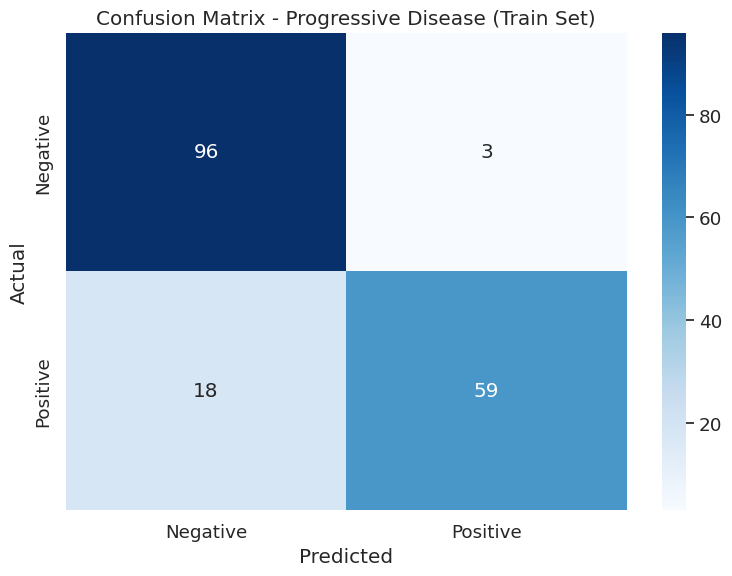

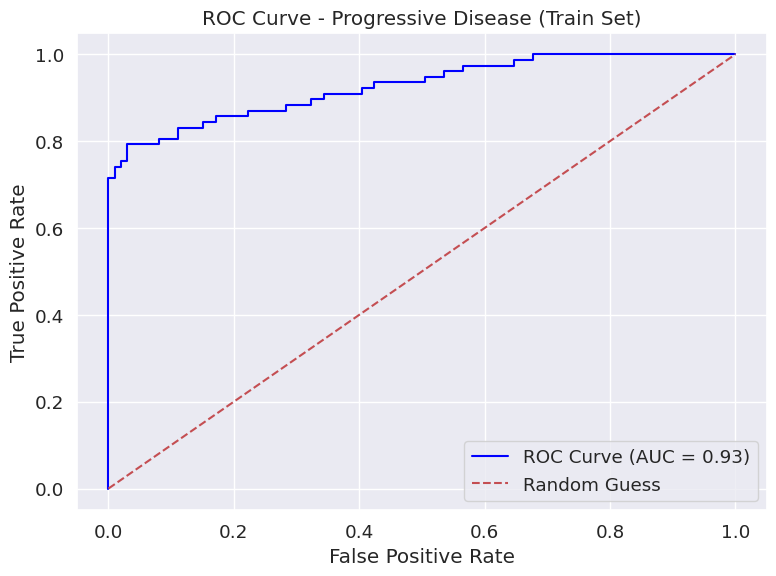

before: (45, 53)
after: (45, 53)

Evaluating Progressive Disease Prediction on Test Set:

Evaluation Results:
              precision    recall  f1-score   support

         0.0       0.79      0.92      0.85        25
         1.0       0.88      0.70      0.78        20

    accuracy                           0.82        45
   macro avg       0.83      0.81      0.81        45
weighted avg       0.83      0.82      0.82        45

ROC AUC Score: 0.91


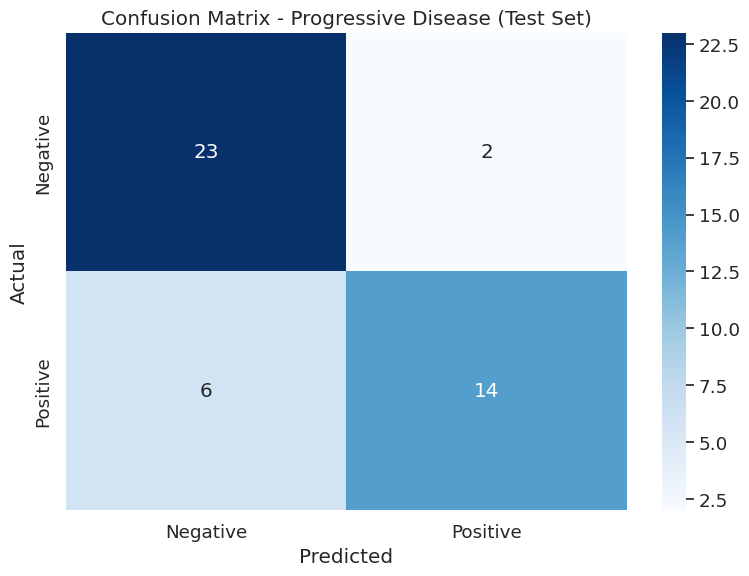

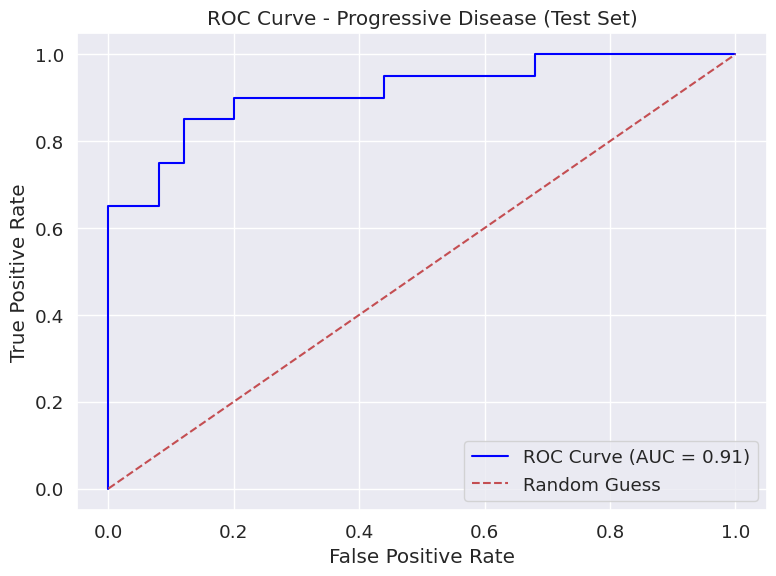

In [34]:
predictor_prog = Predictor(df_train, target_column)
X_train_prog, y_train_prog = predictor_prog.prepare_data()

#cross-val (for uncertainty!)
y_prob_train_prog = predictor_prog.cross_val_predict_proba(X_train_prog, y_train_prog)
predictor_prog.evaluate_model(y_train_prog, y_prob_train_prog)


# VISUALIZE

visualize_all(
    y_true=y_train_prog, 
    y_prob=y_prob_train_prog, 
)


# TRAIN ON FULL TRAIN DATA
predictor_prog.train_model(X_train_prog, y_train_prog)

# PREPARE TEST
predictor_prog_test = Predictor(df_test, target_column)
X_test_prog, y_test_prog = predictor_prog_test.prepare_data()

y_prob_test_prog = predictor_prog.predict(X_test_prog)

print("\nEvaluating Progressive Disease Prediction on Test Set:")
predictor_prog.evaluate_model(y_test_prog, y_prob_test_prog)


visualize_all(
    y_true=y_test_prog, 
    y_prob=y_prob_test_prog, 
    set_type='Test',
    threshold=0.5
)

### Predict Event (Death/Transplantation)

In [35]:
df_train = df_train.dropna(subset=['Progressive Disease'])
df_test = df_test.dropna(subset=['Progressive Disease'])

KeyError: ['Progressive Disease']

In [13]:
y_prob_train_prog.shape

(176,)

In [ ]:
df_train['ProgressiveDisease_Prob'] = y_prob_train_prog
df_test['ProgressiveDisease_Prob'] = y_prob_test_prog

In [10]:


# Step 4: Predict Event (Death/Transplantation)
print("\nPredicting Event (Death/Transplantation) on Training Set:")
predictor_event = Predictor(df_train, 'Event')
X_train_event, y_train_event = predictor_event.prepare_data()

# Cross-validation on training set
y_prob_train_event = predictor_event.cross_val_predict_proba(X_train_event, y_train_event)

# Evaluate cross-validated predictions on training set
predictor_event.evaluate_model(y_train_event, y_prob_train_event)

visualize_all(
    y_true=y_train_event, 
    y_prob=y_prob_train_event,
    threshold=0.45,
)


# Train on full training set
predictor_event.train_model(X_train_event, y_train_event)

# Prepare test set for event prediction
predictor_event_test = Predictor(df_test, 'Event')
X_test_event, y_test_event = predictor_event_test.prepare_data()

# Predict on test set
y_prob_test_event = predictor_event.predict(X_test_event)

# Evaluate on test set
print("\nEvaluating Event Prediction on Test Set:")
predictor_event.evaluate_model(y_test_event, y_prob_test_event)

visualize_all(
    y_true=y_test_event, 
    y_prob=y_prob_test_event, 
    set_type='Test'
)



Predicting Event (Death/Transplantation) on Training Set:
before: (169, 52)


KeyError: ['Event']